<a href="https://colab.research.google.com/github/nimendra-ag/CO2_Emmision/blob/main/Agricultural_CO2_emission_RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

In [ ]:
# Load the dataset
file_path = '/content/Agrofood_co2_emission.csv'
data = pd.read_csv(file_path)

In [ ]:
data.head()

,Area,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,...,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission,Average Temperature °C
0,Afghanistan,1990,14.7237,0.0557,205.6077,686.00,0.0,11.807483,63.1152,-2388.803,...,319.1763,0.0,0.0,NaN,9655167.0,2593947.0,5348387.0,5346409.0,2198.963539,0.536167
1,Afghanistan,1991,14.7237,0.0557,209.4971,678.16,0.0,11.712073,61.2125,-2388.803,...,342.3079,0.0,0.0,NaN,10230490.0,2763167.0,5372959.0,5372208.0,2323.876629,0.020667
2,Afghanistan,1992,14.7237,0.0557,196.5341,686.00,0.0,11.712073,53.3170,-2388.803,...,349.1224,0.0,0.0,NaN,10995568.0,2985663.0,6028494.0,6028939.0,2356.304229,-0.259583
3,Afghanistan,1993,14.7237,0.0557,230.8175,686.00,0.0,11.712073,54.3617,-2388.803,...,352.2947,0.0,0.0,NaN,11858090.0,3237009.0,7003641.0,7000119.0,2368.470529,0.101917
4,Afghanistan,1994,14.7237,0.0557,242.0494,705.60,0.0,11.712073,53.9874,-2388.803,...,367.6784,0.0,0.0,NaN,12690115.0,3482604.0,7733458.0,7722096.0,2500.768729,0.372250


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6965 entries, 0 to 6964
Data columns (total 31 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Area                             6965 non-null   object 
 1   Year                             6965 non-null   int64  
 2   Savanna fires                    6934 non-null   float64
 3   Forest fires                     6872 non-null   float64
 4   Crop Residues                    5576 non-null   float64
 5   Rice Cultivation                 6965 non-null   float64
 6   Drained organic soils (CO2)      6965 non-null   float64
 7   Pesticides Manufacturing         6965 non-null   float64
 8   Food Transport                   6965 non-null   float64
 9   Forestland                       6472 non-null   float64
 10  Net Forest conversion            6472 non-null   float64
 11  Food Household Consumption       6492 non-null   float64
 12  Food Retail         

In [ ]:
# Average value of total_emission
average_emission = data['total_emission'].mean()
average_emission

64091.24414739476

In [ ]:
data.duplicated().sum()

0

In [ ]:
#Adjusting a default setting in python so that it displays all the uniques
#values and their count in the 'Area' column

#Adjusting the default setting
pd.set_option('display.max_rows', None)

# Code to get the area counts
area_counts = data["Area"].value_counts()
print(area_counts)

#Reset the adjustment back to its default setting
pd.reset_option('display.max_rows')

Area
Afghanistan                                             31
Isle of Man                                             31
Montserrat                                              31
Morocco                                                 31
Mozambique                                              31
Myanmar                                                 31
Namibia                                                 31
Nauru                                                   31
Nepal                                                   31
Netherlands (Kingdom of the)                            31
New Caledonia                                           31
New Zealand                                             31
Nicaragua                                               31
Niger                                                   31
Nigeria                                                 31
Niue                                                    31
Norway                                             

In [ ]:
unique_area = data['Area'].unique()
print(unique_area)
print(len(unique_area))

['Afghanistan' 'Albania' 'Algeria' 'American Samoa' 'Andorra' 'Angola'
 'Anguilla' 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba'
 'Australia' 'Austria' 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh'
 'Barbados' 'Belarus' 'Belgium' 'Belgium-Luxembourg' 'Belize' 'Benin'
 'Bermuda' 'Bhutan' 'Bolivia (Plurinational State of)'
 'Bosnia and Herzegovina' 'Botswana' 'Brazil' 'British Virgin Islands'
 'Brunei Darussalam' 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cabo Verde'
 'Cambodia' 'Cameroon' 'Canada' 'Cayman Islands'
 'Central African Republic' 'Chad' 'Channel Islands' 'Chile' 'China'
 'China, Hong Kong SAR' 'China, Macao SAR' 'China, mainland'
 'China, Taiwan Province of' 'Colombia' 'Comoros' 'Congo' 'Cook Islands'
 'Costa Rica' 'Croatia' 'Cuba' 'Cyprus' 'Czechia' 'Czechoslovakia'
 "Democratic People's Republic of Korea"
 'Democratic Republic of the Congo' 'Denmark' 'Djibouti' 'Dominica'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea'
 'Eritrea' 'Estonia' 'Eswati

Names of some countries in the dataset has been changed over the time due to some reasons such as political reasons. Therefore, it is necessary to use a common name for that type of countries. The below block is responsible for fixing that issue.

In [ ]:
# Replace 'Ethiopia PDR' with 'Ethiopia' in the 'Area' column
data['Area'] = data['Area'].replace('Ethiopia PDR', 'Ethiopia')

# Replace 'China, mainland' with 'China' in the 'Area' column
data['Area'] = data['Area'].replace('China, mainland', 'China')

# Replace 'Czechoslovakia' with 'Caechia' in the 'Area' column
data['Area'] = data['Area'].replace('Czechoslovakia', 'Czechia')

# Replace 'Yugoslav SFR' with 'Serbia and Montenegro' in the 'Area' column
data['Area'] = data['Area'].replace('Yugoslav SFR', 'Serbia and Montenegro')

# Replace 'Belgium-Luxembourg' with 'Luxembourg' in the 'Area' column
data['Area'] = data['Area'].replace('Belgium-Luxembourg', 'Luxembourg')

# Replace 'South Sudan' and 'Sudan (former)' with 'Sudan' in the 'Area' column
data['Area'] = data['Area'].replace('South Sudan', 'Sudan')
data['Area'] = data['Area'].replace('Sudan (former)', 'Sudan')

# Replace 'Netherlands Antilles (former)' with 'Netherlands (Kingdom of the)' in the 'Area' column
data['Area'] = data['Area'].replace('Netherlands Antilles (former)', 'Netherlands (Kingdom of the)')

# Replace 'Pacific Islands Trust Territory' with 'Micronesia (Federated States of)' in the 'Area' column
data['Area'] = data['Area'].replace('Pacific Islands Trust Territory', 'Micronesia (Federated States of)')

# Replace 'USSR' with 'Russian Federation' in the 'Area' column
data['Area'] = data['Area'].replace('USSR', 'Russian Federation')

In [ ]:
unique_area = data['Area'].unique()
unique_area

array(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Anguilla', 'Antigua and Barbuda', 'Argentina',
       'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan',
       'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus',
       'Belgium', 'Luxembourg', 'Belize', 'Benin', 'Bermuda', 'Bhutan',
       'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'British Virgin Islands',
       'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Channel Islands', 'Chile',
       'China', 'China, Hong Kong SAR', 'China, Macao SAR',
       'China, Taiwan Province of', 'Colombia', 'Comoros', 'Congo',
       'Cook Islands', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus',
       'Czechia', "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
     

In [ ]:
len(unique_area)

226

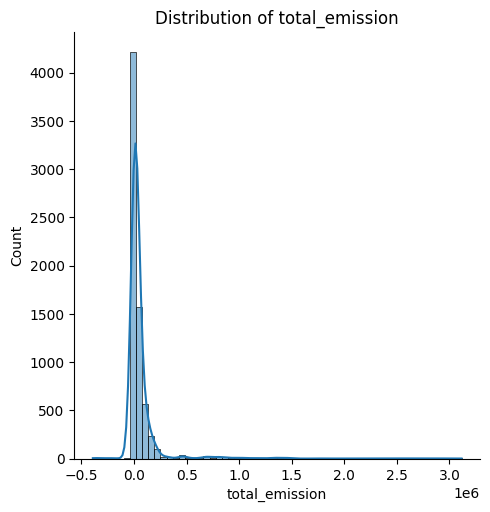

In [ ]:
sns.displot(data['total_emission'], kde=True,bins = 60).set(title='Distribution of total_emission');
plt.show()

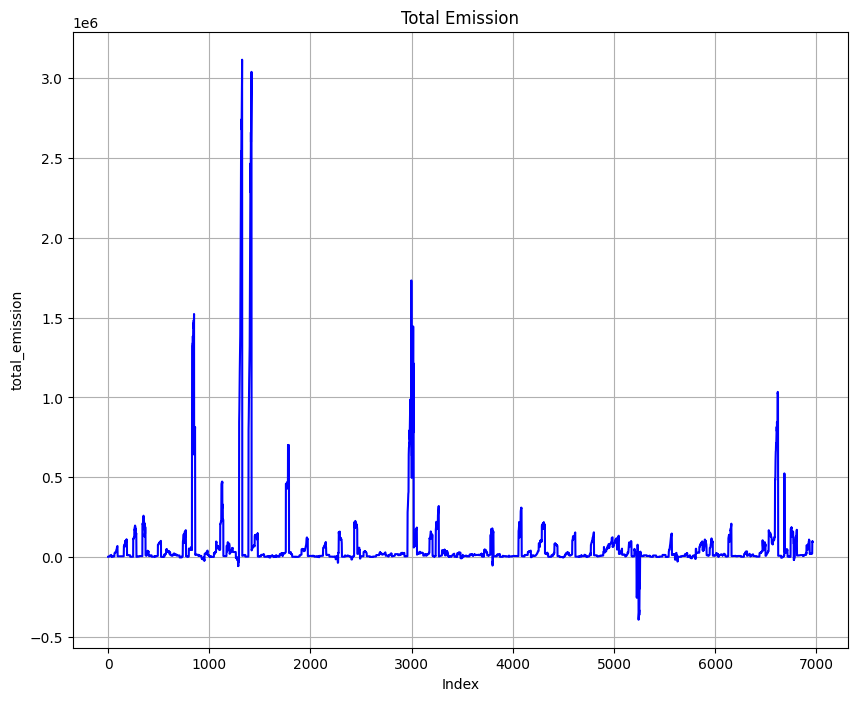

In [ ]:
plt.figure(figsize=(10, 8))
plt.plot(data['total_emission'].index, data['total_emission'].values, color='b')
plt.xlabel('Index')
plt.ylabel('total_emission')
plt.title('Total Emission')
plt.grid(True)

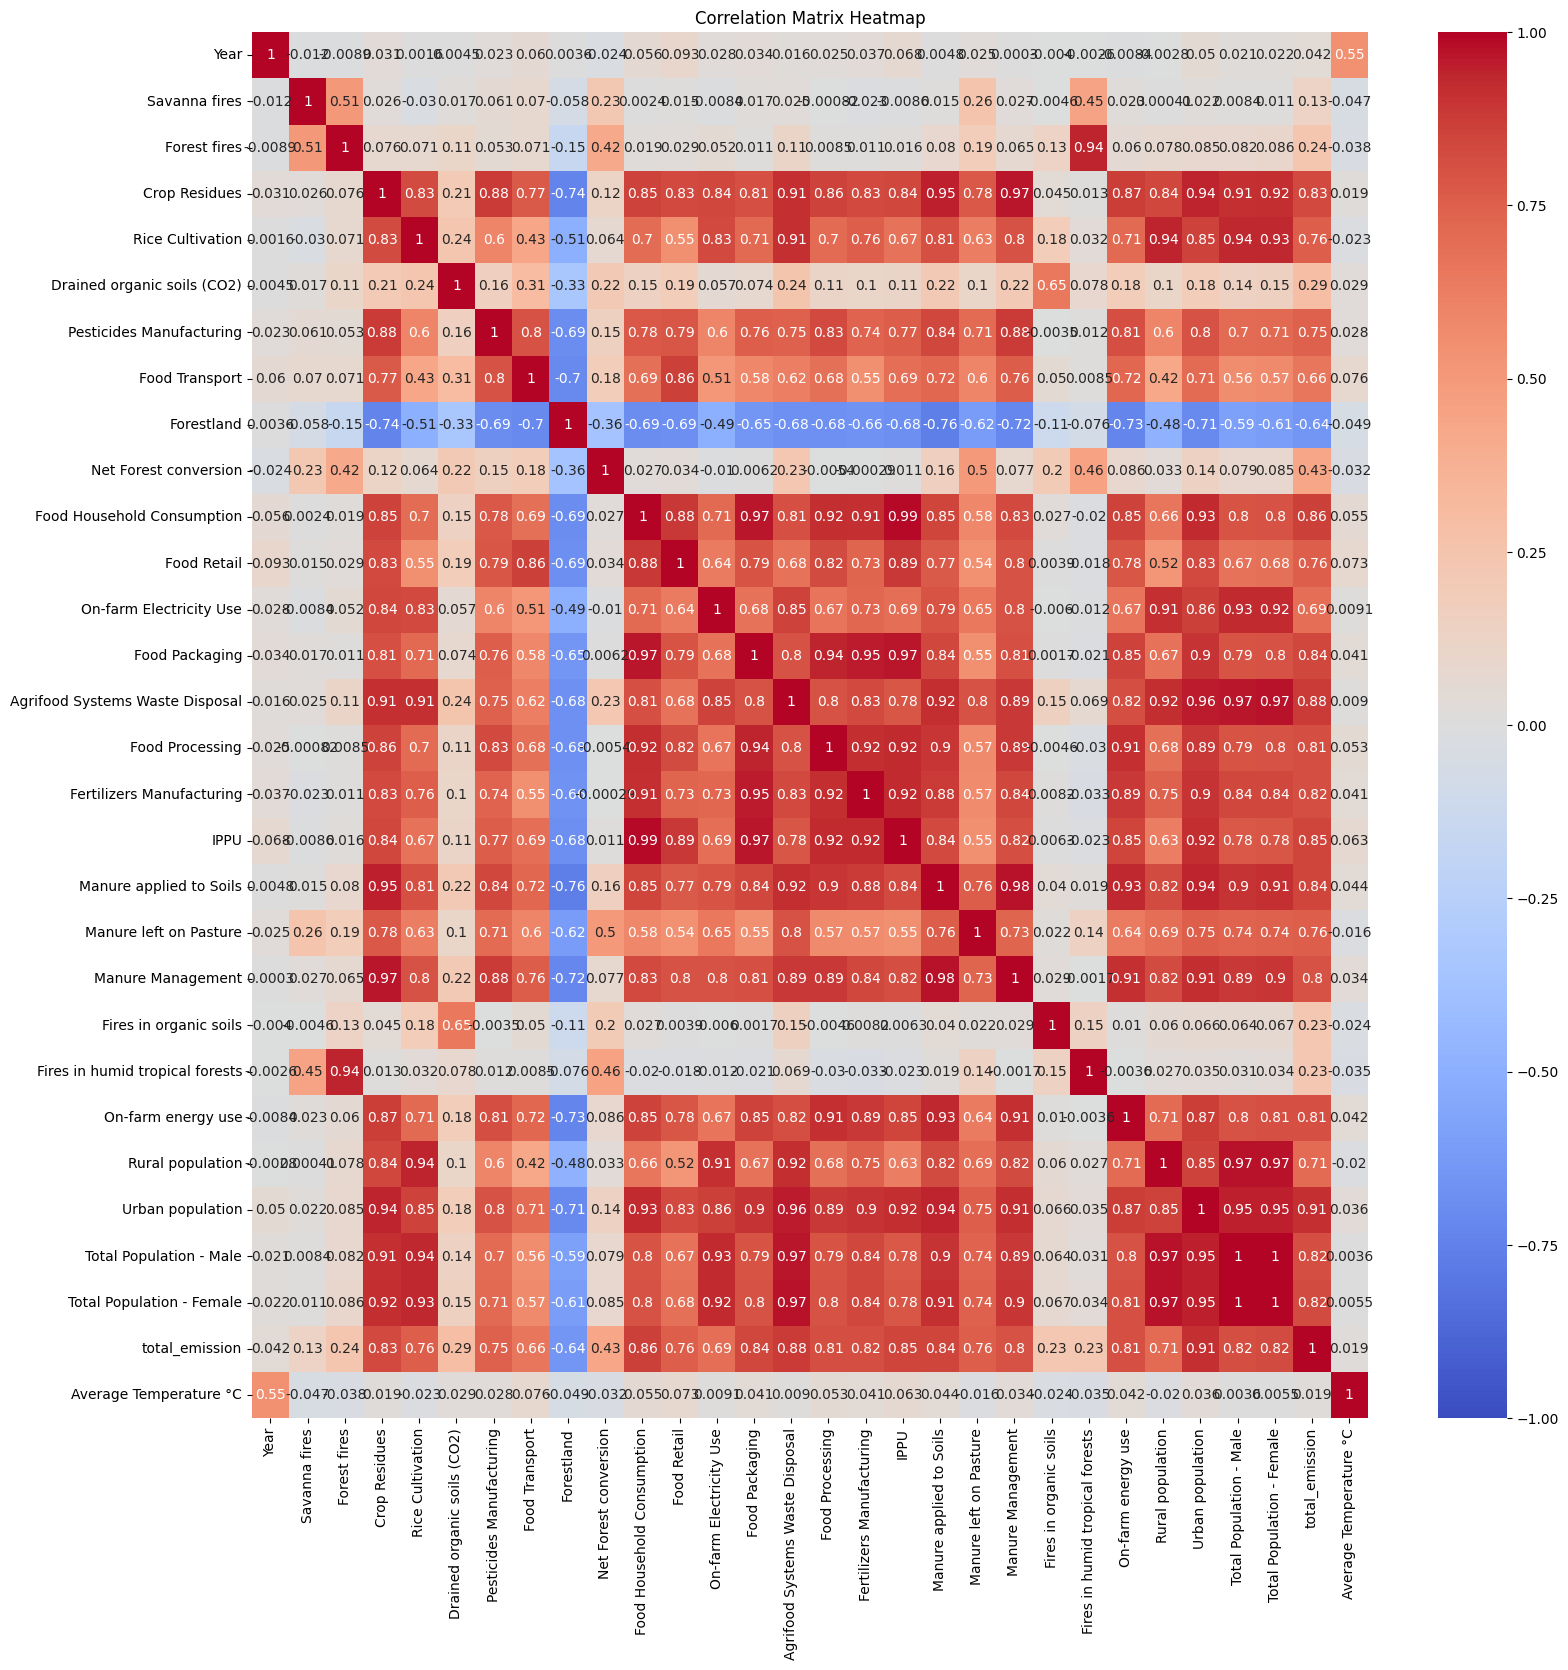

In [ ]:
#Remove the 'Area' because its a categorical variable
data_for_heatmap = data.drop(columns=['Area'], inplace=False)

corr_matrix = data_for_heatmap.corr()

# Plot the heatmap
plt.figure(figsize=(18, 18))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()

removing features which has a lower correlaiton coefficient value than a given threshold value

In [ ]:
# Define a correlation threshold
threshold = 0.6

features_in_corr_matrix = corr_matrix['total_emission'].index.tolist()

# Identify the columns which has a lower corr value
to_drop = [feature for feature in features_in_corr_matrix if abs(corr_matrix['total_emission'][feature]) < threshold]
to_drop

['Year',
 'Savanna fires',
 'Forest fires',
 'Drained organic soils (CO2)',
 'Net Forest conversion',
 'Fires in organic soils',
 'Fires in humid tropical forests',
 'Average Temperature °C']

In [ ]:
# Separate features which has a low correlation coefficient with the target variable
data = data.drop(columns=to_drop)
data.columns

Index(['Area', 'Crop Residues', 'Rice Cultivation', 'Pesticides Manufacturing',
       'Food Transport', 'Forestland', 'Food Household Consumption',
       'Food Retail', 'On-farm Electricity Use', 'Food Packaging',
       'Agrifood Systems Waste Disposal', 'Food Processing',
       'Fertilizers Manufacturing', 'IPPU', 'Manure applied to Soils',
       'Manure left on Pasture', 'Manure Management', 'On-farm energy use',
       'Rural population', 'Urban population', 'Total Population - Male',
       'Total Population - Female', 'total_emission'],
      dtype='object')

Separating X and y

In [ ]:
# Separate features and the target
X = data.drop(columns='total_emission')
y = data['total_emission']

In [ ]:
X.columns

Index(['Area', 'Crop Residues', 'Rice Cultivation', 'Pesticides Manufacturing',
       'Food Transport', 'Forestland', 'Food Household Consumption',
       'Food Retail', 'On-farm Electricity Use', 'Food Packaging',
       'Agrifood Systems Waste Disposal', 'Food Processing',
       'Fertilizers Manufacturing', 'IPPU', 'Manure applied to Soils',
       'Manure left on Pasture', 'Manure Management', 'On-farm energy use',
       'Rural population', 'Urban population', 'Total Population - Male',
       'Total Population - Female'],
      dtype='object')

In [ ]:
y.isnull().sum()

0

In [ ]:
X.isnull().sum()

,0
Area,0
Crop Residues,1389
Rice Cultivation,0
Pesticides Manufacturing,0
Food Transport,0
Forestland,493
Food Household Consumption,473
Food Retail,0
On-farm Electricity Use,0
Food Packaging,0


In [ ]:
# separating categorical and numerical features
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

In [ ]:
categorical_cols

Index(['Area'], dtype='object')

In [ ]:
numerical_cols

Index(['Crop Residues', 'Rice Cultivation', 'Pesticides Manufacturing',
       'Food Transport', 'Forestland', 'Food Household Consumption',
       'Food Retail', 'On-farm Electricity Use', 'Food Packaging',
       'Agrifood Systems Waste Disposal', 'Food Processing',
       'Fertilizers Manufacturing', 'IPPU', 'Manure applied to Soils',
       'Manure left on Pasture', 'Manure Management', 'On-farm energy use',
       'Rural population', 'Urban population', 'Total Population - Male',
       'Total Population - Female'],
      dtype='object')

In [ ]:
# Define preprocessing for numerical data
numerical_transformer = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ]
)
numerical_transformer

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler())])

In [ ]:
# Define preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])
categorical_transformer

Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                ('onehot', OneHotEncoder(handle_unknown='ignore'))])

In [ ]:
# Bundle preprocessings for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 Index(['Crop Residues', 'Rice Cultivation', 'Pesticides Manufacturing',
       'Food Transport', 'Forestland', 'Food Household Consumption',
       'Food Retail', 'On-farm Electricity Use', 'Food Packaging',
       'Agrifood Systems Waste Disposal', 'Food Processing',
       'Fertilizers Manufacturing', 'IPPU', 'Manure applied to Soils',
       'Manure left on Pasture', 'Manure Management', 'On-farm energy use',
       'Rural population', 'Urban population', 'Total Population - Male',
       'Total Population - Female'],
      dtype='object')),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 Index(['Area'], dtype='object'))])

In [ ]:

# Step 1: Split the data into training set and a temp set (for test + validation)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)  # 60% training, 40% temp

# Step 2: Split the temp set into test and validation sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)  # 50% of 40% -> 20% test, 20% validation


In [ ]:
model = RandomForestRegressor()

param_distributions = {
    'n_estimators': randint(100, 500),
    'max_depth': range(3, 21),
    'min_samples_split': range(2, 21),
    'min_samples_leaf': range(1,11),
    'max_features': ['sqrt', 'log2', 0.2, 0.5, None],
    'min_weight_fraction_leaf': [0.0, 0.0025, 0.005, 0.0075, 0.01],
    'min_impurity_decrease': [0.0, 0.01, 0.05, 0.1, 0.15],
    'max_leaf_nodes': range(3, 21),
    'ccp_alpha': [0.0, 0.001, 0.005, 0.01, 0.05]
}

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    model,
    param_distributions=param_distributions,
    n_iter=100,  # Number of iterations
    scoring='neg_mean_squared_error',  # Use MSE or other relevant metric
    cv=5,  # Cross-validation folds
    verbose=1,
    random_state=42,
    n_jobs=-1  # Use all processors
)


# Assuming X_train and y_train are your training data and labels
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', random_search)
])

pipeline.fit(X_val, y_val)

# Get the best parameters and the best model
best_params = random_search.best_params_
best_model = random_search.best_estimator_

print(f"Best Parameters: {best_params}")
print(best_model)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Parameters: {'ccp_alpha': 0.005, 'max_depth': 18, 'max_features': None, 'max_leaf_nodes': 11, 'min_impurity_decrease': 0.1, 'min_samples_leaf': 1, 'min_samples_split': 5, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 497}
RandomForestRegressor(ccp_alpha=0.005, max_depth=18, max_features=None,
                      max_leaf_nodes=11, min_impurity_decrease=0.1,
                      min_samples_split=5, n_estimators=497)


In [ ]:
model = best_model
model

RandomForestRegressor(ccp_alpha=0.005, max_depth=18, max_features=None,
                      max_leaf_nodes=11, min_impurity_decrease=0.1,
                      min_samples_split=5, n_estimators=497)

In [ ]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', model)
])

In [ ]:
# Fit all the transformers one after the other and sequentially transform the data.
# Finally, fit the transformed data using the final estimator.
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Crop Residues', 'Rice Cultivation', 'Pesticides Manufacturing',
       'Food Transport', 'Forestland', 'Food Household Consumption',
       'Food Retail', 'On-farm Electricity Use', 'Food Packaging',
       'Agrifood Syst...
       'Total Population - Female'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['Area'], dtype='object'))])),
                ('model',
                 RandomForestRegressor(ccp_alpha=0.005, max_depth=18,
                                       max_features=None, max_leaf_nodes=11,
                                       min_impurity_decrease=0.1,
                                       min_samples_split=5,
                                       n_estimators=497))])

In [ ]:
train_predictions = pipeline.predict(X_train)
train_r2_score = r2_score(y_train, train_predictions)
print("Training R2 score:", train_r2_score)

Training R2 score: 0.9655864162044085


In [ ]:
test_predictions = pipeline.predict(X_test)
test_r2_score = r2_score(y_test, test_predictions)
print("Testing R2 score:", test_r2_score)

Testing R2 score: 0.9633704957941375


In [ ]:
mae = mean_absolute_error(y_test, test_predictions)
print(f'Mean Absolute Error for Random Forest Algorithm: {mae}')

Mean Absolute Error for GradientBoost Algorithm: 22671.886568709546


The following 3 blocks of codes shows that the train set, test set and the validation set remain unchanged even after building the model. This is happeing because that we have used 'Pipeline'. The pipeline make its own copy of data when operating with data. Therefore the original dataset is not changed.